In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler



In [3]:
df = pd.read_csv('markowitz_dataset(Sheet1).csv', encoding='latin1')
df = df.dropna(subset=['taux_credit', 'Emission_GES_kgCO2_m2_an', 'asset_type_cre', 'secteur_activite', 'Etiquette_GES'])
df['Taux crédit'] = pd.to_numeric(df['taux_credit'], errors='coerce')
df['Emission_GES_kgCO2_m2_an'] = pd.to_numeric(df['Emission_GES_kgCO2_m2_an'], errors='coerce')
df['Rendement_Composite']=df['Taux crédit']

In [4]:
df.head()

,N°DPE,secteur_activite,asset_type_cre,Emission_GES_kgCO2_m2_an,Etiquette_GES,taux_credit,Taux crédit,Rendement_Composite
0,2478T0226264E,locaux d'entreprise (bureaux),"Bâtiment à usage principale de bureau, d'admin...",6.9,B,0.02,0.02,0.02
1,2394T1781959E,locaux d'entreprise (bureaux),"Bâtiment à usage principale de bureau, d'admin...",6.1,B,0.02,0.02,0.02
2,2413T2148090B,locaux d'entreprise (bureaux),"Bâtiment à usage principale de bureau, d'admin...",9.2,B,0.02,0.02,0.02
3,2372T2176472X,U : Établissements de soins,Bâtiment à occupation continue (par exemple: h...,7.0,B,0.02,0.02,0.02
4,2482T2044916M,"W : Administrations, banques, bureaux","Bâtiment à usage principale de bureau, d'admin...",3.1,A,0.01,0.01,0.01


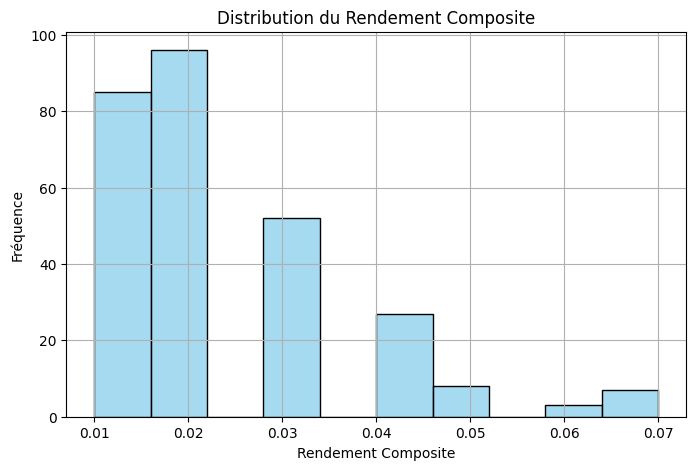

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Rendement_Composite', color='skyblue')
plt.title('Distribution du Rendement Composite')
plt.xlabel('Rendement Composite')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()


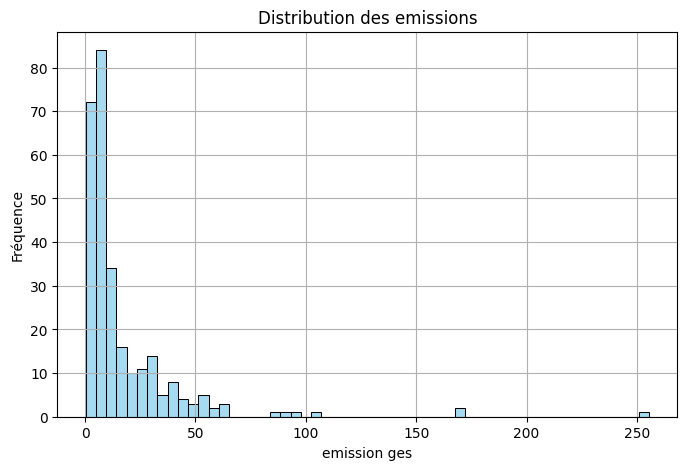

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Emission_GES_kgCO2_m2_an', color='skyblue')
plt.title('Distribution des emissions')
plt.xlabel('emission ges')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

In [5]:
max(np.random.normal(0,0.1,1000))

np.float64(0.347094044931813)

# Explication des Choix de Paramètres dans la Simulation de la Matrice de Covariance

Dans ce modèle, nous n'avons pas accès à une série temporelle réelle des rendements (ici représentés par le `taux_credit` utilisé comme proxy pour le **Rendement_Composite**). Pour pallier cette absence de données historiques, nous simulons un historique artificiel en générant **T = 1000** observations pour chaque actif. Voici les principales hypothèses et justifications :

1. **Interprétation de T = 1000 :**
   - **T** représente le nombre d'observations simulées, que nous interprétons ici comme des **données journalières** sur environ 1000 jours.
   - Cette durée permet d'obtenir un échantillon suffisamment grand pour estimer de manière stable la **matrice de covariance** entre les rendements simulés des différents actifs.
   - L'idée est de modéliser la variabilité potentielle du rendement (ici, le `taux_credit`) sur une période d'environ 1000 jours, ce qui correspond approximativement à 3 ans de données journalières, bien que ce ne soit qu'une approximation.

2. **Choix du Scale = 0.05 pour la Simulation :**
   - Pour chaque actif, nous générons des observations suivant une distribution normale avec :
     - Une **moyenne** égale à la valeur observée du `taux_credit` (notre proxy de rendement composite).
     - Un **écart-type** fixé à **0.05**.
   - Le paramètre **0.05** est choisi en fonction de l'échelle des valeurs observées dans notre DataFrame. Ce choix suppose que la volatilité journalière des taux de crédit est relativement faible, ce qui est cohérent si les taux de crédit varient peu d'un jour à l'autre.
   - Cette hypothèse permet de simuler des fluctuations journalières autour de la moyenne, fournissant ainsi un échantillon de données permettant de calculer une matrice de covariance robuste pour l'optimisation du portefeuille.

3. **Utilisation de la Simulation :**
   - La simulation génère un ensemble de rendements "artificiels" pour chaque actif, organisés dans une matrice de dimensions \((T, n)\) où \(n\) est le nombre d'actifs.
   - En appliquant la fonction `np.cov(..., rowvar=False)`, nous calculons la **matrice de covariance** qui quantifie :
     - La **variance** de chaque actif (éléments diagonaux).
     - La **covariance** entre les actifs (éléments hors diagonale).
   - Cette matrice de covariance est essentielle dans le modèle de Markowitz, car elle permet d'évaluer le **risque** du portefeuille et d'optimiser la répartition des actifs en minimisant la variance globale tout en respectant les contraintes (rendement minimal et émission maximale).

## En résumé

- **T = 1000** : Nous simulons 1000 jours de données journalières pour obtenir un échantillon suffisamment grand pour estimer la covariance.
- **Scale = 0.05** : Cet écart-type est choisi pour représenter la volatilité journalière des taux de crédit (notre proxy de rendement composite), en se basant sur l'hypothèse que les taux varient peu d'un jour à l'autre.
- **But de la simulation** : Générer une matrice de covariance robuste, indispensable pour évaluer le risque du portefeuille dans le cadre du modèle de Markowitz.

Ces hypothèses, bien que simplificatrices, fournissent une base pour modéliser la variabilité des rendements et effectuer l'optimisation du portefeuille en l'absence de séries temporelles historiques réelles.


Target composite return = 0.02
Seuil d'émission = 7.9
                                     CVXPY                                     
                                     v1.6.4                                    
(CVXPY) Mar 26 10:08:45 AM: Your problem has 278 variables, 281 constraints, and 0 parameters.
(CVXPY) Mar 26 10:08:45 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Mar 26 10:08:45 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Mar 26 10:08:45 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Mar 26 10:08:45 AM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Mar 26 

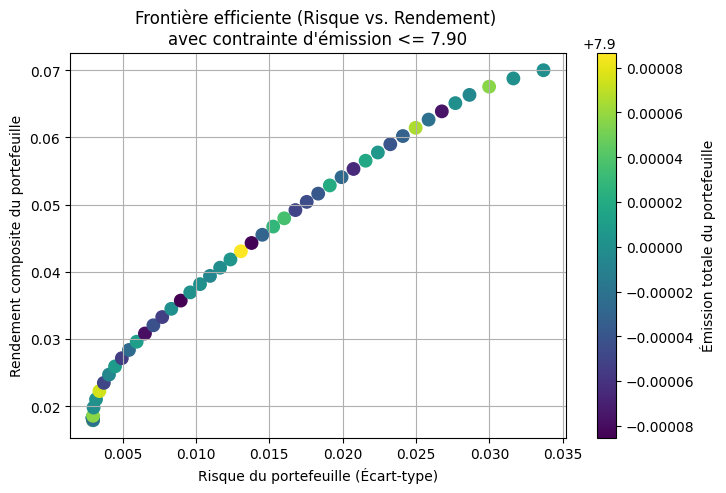

In [6]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

composite_returns = df['Rendement_Composite'].values
emissions = df['Emission_GES_kgCO2_m2_an'].values
n = len(composite_returns)


T = 1000  
composite_history = np.array([
    np.random.normal(loc=r, scale=0.05, size=T) 
    for r in composite_returns
]).T
covariance_comp = np.cov(composite_history, rowvar=False)


target_return = np.median(composite_returns)
print("Target composite return =", target_return)


SEUIL_GES = np.percentile(emissions, 50)
print("Seuil d'émission =", SEUIL_GES)


w = cp.Variable(n)  
constraints = [
    cp.sum(w) == 1,                        
    w >= 0,                                
    composite_returns @ w >= target_return,  
    emissions @ w <= SEUIL_GES             
]
objective = cp.Minimize(cp.quad_form(w, covariance_comp))  
problem = cp.Problem(objective, constraints)
problem.solve(solver=cp.SCS, verbose=True)


optimal_weights = w.value
df['Poids_optimal'] = optimal_weights


budget = 2e9
df['Allocation'] = df['Poids_optimal'] * budget


portfolio_composite_return = composite_returns @ optimal_weights
portfolio_variance = optimal_weights.T @ covariance_comp @ optimal_weights
portfolio_std = np.sqrt(portfolio_variance)
portfolio_emission = emissions @ optimal_weights

print("\nRendement composite du portefeuille optimisé :", portfolio_composite_return)
print("Risque (écart-type) du portefeuille optimisé :", portfolio_std)
print("Émission totale du portefeuille optimisé :", portfolio_emission)

rendements_portefeuille = []
risques_portefeuille = []
emissions_portefeuille = []  
target_values = np.linspace(composite_returns.min(), composite_returns.max(), 50)

for target in target_values:
    w_iter = cp.Variable(n)
    constraints_iter = [
        cp.sum(w_iter) == 1,
        w_iter >= 0,
        composite_returns @ w_iter >= target,
        emissions @ w_iter <= SEUIL_GES  
    ]
    prob_iter = cp.Problem(cp.Minimize(cp.quad_form(w_iter, covariance_comp)), constraints_iter)
    prob_iter.solve(solver=cp.SCS, verbose=False)
    
    if w_iter.value is not None:
        ret = composite_returns @ w_iter.value
        var = w_iter.value.T @ covariance_comp @ w_iter.value
        risque = np.sqrt(var)
        emis = emissions @ w_iter.value
        risques_portefeuille.append(risque)
        rendements_portefeuille.append(ret)
        emissions_portefeuille.append(emis)
    else:
        risques_portefeuille.append(np.nan)
        rendements_portefeuille.append(np.nan)
        emissions_portefeuille.append(np.nan)

plt.figure(figsize=(8,5))
sc = plt.scatter(risques_portefeuille, rendements_portefeuille, c=emissions_portefeuille, cmap='viridis', s=80)
plt.colorbar(sc, label='Émission totale du portefeuille')
plt.xlabel("Risque du portefeuille (Écart-type)")
plt.ylabel("Rendement composite du portefeuille")
plt.title("Frontière efficiente (Risque vs. Rendement) \navec contrainte d'émission <= {:.2f}".format(SEUIL_GES))
plt.grid(True)
plt.show()


In [51]:
print(covariance_comp)

[[ 2.42729478e-03 -2.71490673e-05  4.84690934e-05 ...  8.18773343e-05
   1.58745412e-04 -1.67264008e-05]
 [-2.71490673e-05  2.54966340e-03  3.88262956e-05 ...  1.85077382e-07
   3.02666114e-05 -1.65231174e-04]
 [ 4.84690934e-05  3.88262956e-05  2.66023604e-03 ...  7.49301439e-05
   1.45250761e-04  1.63766669e-04]
 ...
 [ 8.18773343e-05  1.85077382e-07  7.49301439e-05 ...  2.49083158e-03
   1.05872157e-04  2.21250944e-04]
 [ 1.58745412e-04  3.02666114e-05  1.45250761e-04 ...  1.05872157e-04
   2.53732286e-03  6.43341142e-05]
 [-1.67264008e-05 -1.65231174e-04  1.63766669e-04 ...  2.21250944e-04
   6.43341142e-05  2.50744632e-03]]


/tmp/ipykernel_924110/1916922225.py:28: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/onyxia/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


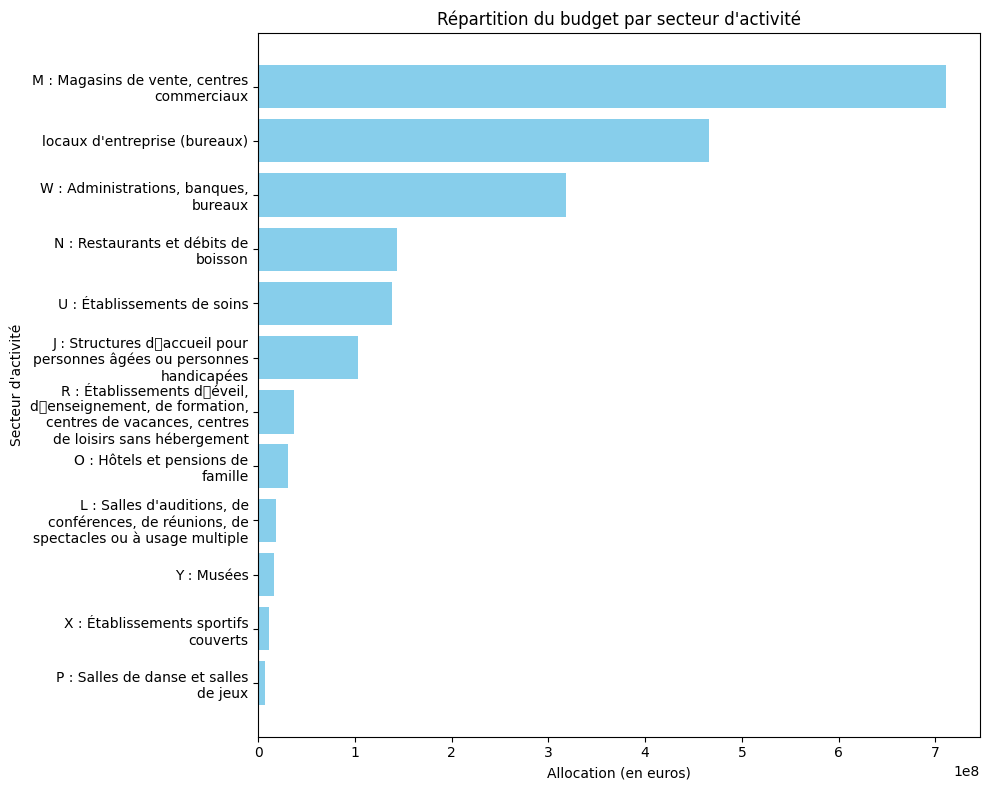

In [9]:
import textwrap
import matplotlib.pyplot as plt

# 1. Agréger et trier les allocations par secteur_activite
df_sorted = df.groupby('secteur_activite')['Allocation'].sum().sort_values(ascending=True)

# 2. Création de la figure
fig, ax = plt.subplots(figsize=(10, 8))

# Positions sur l'axe Y
y_pos = range(len(df_sorted))

# Diagramme en barres horizontales
ax.barh(y_pos, df_sorted.values, color='skyblue')

# Gestion des étiquettes sur l'axe Y
# On applique un wrapping pour couper les labels trop longs
wrapped_labels = [textwrap.fill(label, width=30) for label in df_sorted.index]

ax.set_yticks(y_pos)
ax.set_yticklabels(wrapped_labels)

# Labels et titre
ax.set_xlabel("Allocation (en euros)")
ax.set_ylabel("Secteur d'activité")
ax.set_title("Répartition du budget par secteur d'activité")

plt.tight_layout()
plt.show()


Seuil d'émission global = 7.9

Traitement de la catégorie: Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)
  Rendement cible = 0.03
  Aucune solution faisable pour la catégorie Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)

Traitement de la catégorie: Bâtiment à occupation continue (par exemple: hopitaux, hôtels, internats, maisons de retraite, etc)
  Rendement cible = 0.02
  Allocation totale pour la catégorie: 2000000063.6493127

Traitement de la catégorie: Bâtiment à usage principale de bureau, d'administration ou d'enseignement
  Rendement cible = 0.02
  Allocation totale pour la catégorie: 2000000138.3697817

Traitement de la catégorie: Centre commercial
  Rendement cible = 0.02
  Allocation totale pour la catégorie: 2000000000.5403054

Aperçu des résultats par catégorie:
            N°DPE                                     asset_type_cre  \
3   2372T2176472X  Bâtiment à occupation conti

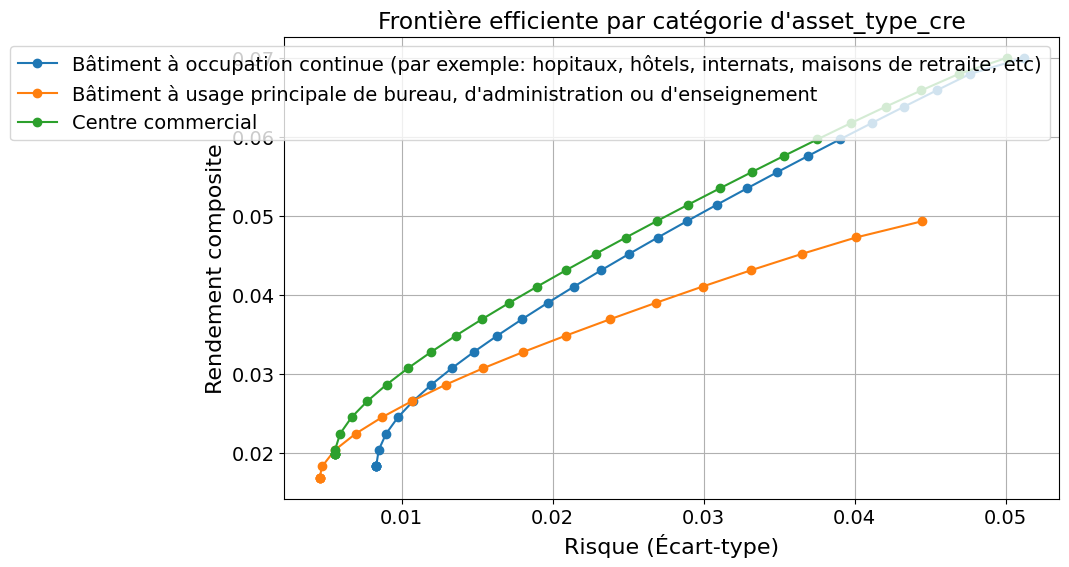

In [52]:
import pandas as pd
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

df2 = pd.read_csv('markowitz_dataset(Sheet1).csv', encoding='latin1')

df2.rename(columns={"Taux crédit": "taux_credit"}, inplace=True)

df2 = df2.dropna(subset=['taux_credit', 'Emission_GES_kgCO2_m2_an', 'asset_type_cre'])


df2['taux_credit'] = pd.to_numeric(df2['taux_credit'], errors='coerce')
df2['Emission_GES_kgCO2_m2_an'] = pd.to_numeric(df2['Emission_GES_kgCO2_m2_an'], errors='coerce')

df2['Emission'] = df2['Emission_GES_kgCO2_m2_an']

df2['Rendement_Composite'] = df2['taux_credit']

SEUIL_GES = np.percentile(df2['Emission'], 50)
print("Seuil d'émission global =", SEUIL_GES)

budget = 2e9

T = 1000

results_list = []  

for category, group in df2.groupby('asset_type_cre'):
    print("\nTraitement de la catégorie:", category)
    

    if len(group) < 1:
        continue

    composite_returns_group = group['Rendement_Composite'].values
    emissions_group = group['Emission'].values
    n_group = len(group)
    
    # Simulation d'un historique pour chaque actif du groupe
    composite_history_group = np.array([
        np.random.normal(loc=r, scale=0.05, size=T) 
        for r in composite_returns_group
    ]).T
    covariance_group = np.cov(composite_history_group, rowvar=False)
    
    
    target_return_group = np.median(composite_returns_group)
    print("  Rendement cible =", target_return_group)
    
  
    w = cp.Variable(n_group, nonneg=True)
    constraints = [
        cp.sum(w) == 1,                                  
        composite_returns_group @ w >= target_return_group, 
        emissions_group @ w <= SEUIL_GES                 
    ]
    objective = cp.Minimize(
        cp.quad_form(w, covariance_group) 
    )
    problem = cp.Problem(objective, constraints)
    problem.solve(solver=cp.SCS, verbose=False)
    
    if w.value is not None:
        
        group = group.copy()
        group['Poids_optimal'] = w.value
        group['Allocation'] = group['Poids_optimal'] * budget
        print("  Allocation totale pour la catégorie:", group['Allocation'].sum())
        results_list.append(group)
    else:
        print("  Aucune solution faisable pour la catégorie", category)

df_results = pd.concat(results_list)
print("\nAperçu des résultats par catégorie:")
print(df_results[['N°DPE', 'asset_type_cre', 'Poids_optimal', 'Allocation']].head())


allocation_par_categorie = df_results.groupby('asset_type_cre')['Allocation'].sum()
print("\nAllocation totale par catégorie:")
print(allocation_par_categorie)
plt.figure(figsize=(10, 6))
for category, group in df_results.groupby('asset_type_cre'):
    # Pour chaque catégorie, faire varier le rendement cible au sein du groupe
    composite_returns_group = group['Rendement_Composite'].values
    emissions_group = group['Emission'].values
    n_group = len(group)
    
    target_values = np.linspace(composite_returns_group.min(), composite_returns_group.max(), 30)
    risques_list = []
    rendements_list = []
    
    # Pour estimer la covariance du groupe
    composite_history_group = np.array([
        np.random.normal(loc=r, scale=0.05, size=T) 
        for r in composite_returns_group
    ]).T
    covariance_group = np.cov(composite_history_group, rowvar=False)
    
    for target in target_values:
        w_iter = cp.Variable(n_group, nonneg=True)
        constraints_iter = [
            cp.sum(w_iter) == 1,
            composite_returns_group @ w_iter >= target,
            emissions_group @ w_iter <= SEUIL_GES
        ]
        prob_iter = cp.Problem(cp.Minimize(cp.quad_form(w_iter, covariance_group)), constraints_iter)
        prob_iter.solve(solver=cp.SCS, verbose=False)
        if w_iter.value is not None:
            var_val = w_iter.value.T @ covariance_group @ w_iter.value
            risque_val = np.sqrt(var_val)
            rendement_val = composite_returns_group @ w_iter.value
            risques_list.append(risque_val)
            rendements_list.append(rendement_val)
        else:
            risques_list.append(np.nan)
            rendements_list.append(np.nan)
    
    plt.plot(risques_list, rendements_list, marker='o', label=str(category))

plt.xlabel("Risque (Écart-type)")
plt.ylabel("Rendement composite")
plt.title("Frontière efficiente par catégorie d'asset_type_cre")
plt.legend()
plt.grid(True)
plt.show()


Seuil d'émission global = 7.9

Traitement du secteur d'activité: J : Structures daccueil pour personnes âgées ou personnes handicapées
  Rendement cible = 0.02
  Allocation totale pour le secteur: 2000000353.8387403

Traitement du secteur d'activité: L : Salles d'auditions, de conférences, de réunions, de spectacles ou à usage multiple
  Rendement cible = 0.01
  Allocation totale pour le secteur: 1999999987.1263998

Traitement du secteur d'activité: M : Magasins de vente, centres commerciaux
  Rendement cible = 0.02
  Allocation totale pour le secteur: 2000000086.6818118

Traitement du secteur d'activité: N : Restaurants et débits de boisson
  Rendement cible = 0.03
  Aucune solution faisable pour le secteur N : Restaurants et débits de boisson

Traitement du secteur d'activité: O : Hôtels et pensions de famille
  Rendement cible = 0.025
  Aucune solution faisable pour le secteur O : Hôtels et pensions de famille

Traitement du secteur d'activité: P : Salles de danse et salles de jeux

/tmp/ipykernel_578426/4139465054.py:152: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  sc = ax.scatter(
/tmp/ipykernel_578426/4139465054.py:167: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  scatter_for_cb = ax.scatter([], [], cmap='plasma', norm=norm)
/tmp/ipykernel_578426/4139465054.py:189: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.tight_layout()  # Ajuste l'espace pour que tout soit bien visible
/home/onyxia/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


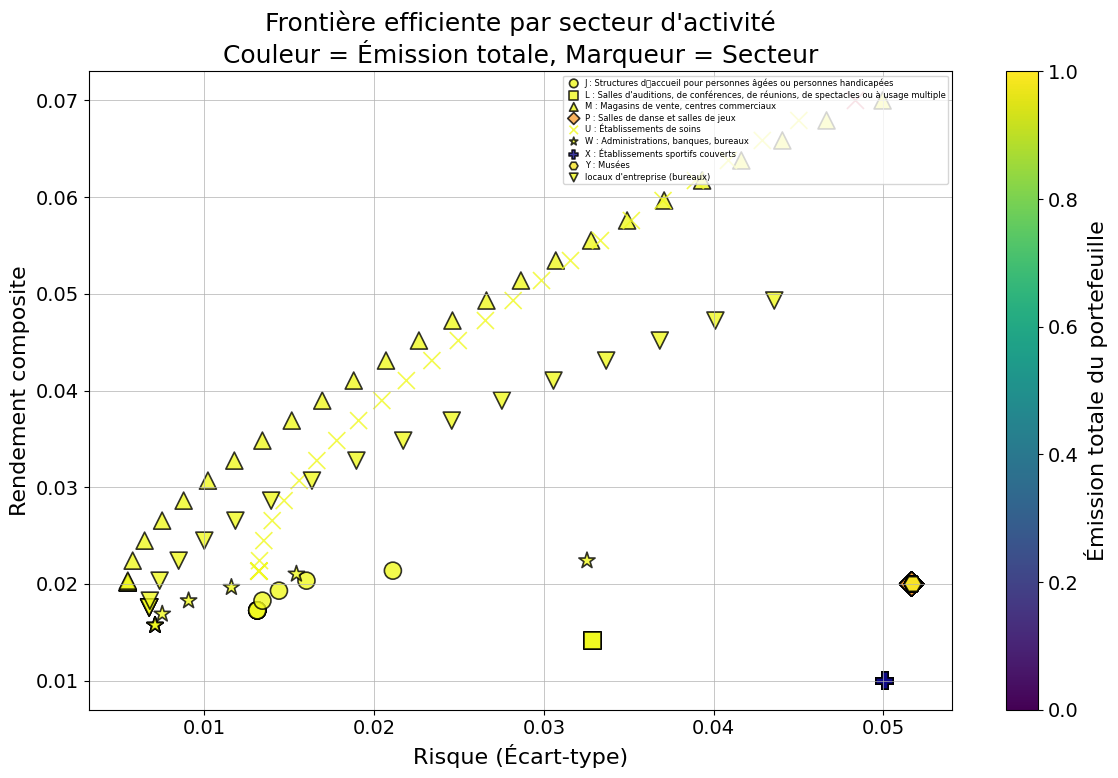

In [ ]:
import pandas as pd
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

df2 = pd.read_csv('markowitz_dataset(Sheet1).csv', encoding='latin1')
df2.rename(columns={"Taux crédit": "taux_credit"}, inplace=True)


df2 = df2.dropna(subset=['taux_credit', 'Emission_GES_kgCO2_m2_an', 'secteur_activite'])

df2['taux_credit'] = pd.to_numeric(df2['taux_credit'], errors='coerce')
df2['Emission_GES_kgCO2_m2_an'] = pd.to_numeric(df2['Emission_GES_kgCO2_m2_an'], errors='coerce')

df2['Emission'] = df2['Emission_GES_kgCO2_m2_an']

df2['Rendement_Composite'] = df2['taux_credit']


SEUIL_GES = np.percentile(df2['Emission'], 50)
print("Seuil d'émission global =", SEUIL_GES)

budget = 2e9  
T = 1000       
results_list = []
for sector, group in df2.groupby('secteur_activite'):
    print("\nTraitement du secteur d'activité:", sector)
    if len(group) < 1:
        continue

    composite_returns_group = group['Rendement_Composite'].values
    emissions_group = group['Emission'].values
    n_group = len(group)
    
    # Simulation pour estimer la covariance (scale=0.1)
    sim_list = [np.random.normal(loc=r, scale=0.05, size=T) for r in composite_returns_group]
    if n_group == 1:
        # Cas d'un seul actif : forcer la forme 2D
        composite_history_group = np.atleast_2d(sim_list[0]).T
        covariance_group = np.array([[np.var(composite_history_group)]])
    else:
        composite_history_group = np.array(sim_list).T
        covariance_group = np.cov(composite_history_group, rowvar=False)
    
    target_return_group = np.median(composite_returns_group)
    print("  Rendement cible =", target_return_group)
    
   
    w = cp.Variable(n_group, nonneg=True)
    constraints = [
        cp.sum(w) == 1,
        composite_returns_group @ w >= target_return_group,
        emissions_group @ w <= SEUIL_GES
    ]
   
    objective = cp.Minimize(
        cp.quad_form(w, covariance_group))
    
    problem = cp.Problem(objective, constraints)
    problem.solve(solver=cp.SCS, verbose=False)
    
    if w.value is not None:
        group = group.copy()
        group['Poids_optimal'] = w.value
        group['Allocation'] = group['Poids_optimal'] * budget
        print("  Allocation totale pour le secteur:", group['Allocation'].sum())
        results_list.append(group)
    else:
        print("  Aucune solution faisable pour le secteur", sector)

df_results = pd.concat(results_list)
print("\nAperçu des résultats par secteur d'activité:")
print(df_results[['N°DPE', 'secteur_activite', 'Poids_optimal', 'Allocation']].head())

allocation_par_secteur = df_results.groupby('secteur_activite')['Allocation'].sum()
print("\nAllocation totale par secteur:")
print(allocation_par_secteur)

markers = ['o', 's', '^', 'D', 'x', '*', 'P', 'H', 'v', '<', '>', 'd']
sectors = df_results['secteur_activite'].unique()

all_risques = []
all_rendements = []
all_emissions = []
all_sectors = []

for i, sector in enumerate(sectors):
    sub = df_results[df_results['secteur_activite'] == sector]
    if len(sub) == 0:
        continue
    composite_returns_group = sub['Rendement_Composite'].values
    emissions_group = sub['Emission'].values
    n_group = len(sub)

    sim_list = [np.random.normal(loc=r, scale=0.05, size=T) for r in composite_returns_group]
    if n_group == 1:
        composite_history_group = np.atleast_2d(sim_list[0]).T
        covariance_group = np.array([[np.var(composite_history_group)]])
    else:
        composite_history_group = np.array(sim_list).T
        covariance_group = np.cov(composite_history_group, rowvar=False)
    
    target_values = np.linspace(composite_returns_group.min(), composite_returns_group.max(), 30)
    for target in target_values:
        w_iter = cp.Variable(n_group, nonneg=True)
        constraints_iter = [
            cp.sum(w_iter) == 1,
            composite_returns_group @ w_iter >= target,
            emissions_group @ w_iter <= SEUIL_GES
        ]
        prob_iter = cp.Problem(cp.Minimize(cp.quad_form(w_iter, covariance_group)), constraints_iter)
        prob_iter.solve(solver=cp.SCS, verbose=False)
        if w_iter.value is not None:
            var_val = w_iter.value.T @ covariance_group @ w_iter.value
            risque_val = np.sqrt(var_val)
            rendement_val = composite_returns_group @ w_iter.value
            ges_val = emissions_group @ w_iter.value
            all_risques.append(risque_val)
            all_rendements.append(rendement_val)
            all_emissions.append(ges_val)
            all_sectors.append(sector)
        else:
            all_risques.append(np.nan)
            all_rendements.append(np.nan)
            all_emissions.append(np.nan)
            all_sectors.append(sector)

all_risques = np.array(all_risques)
all_rendements = np.array(all_rendements)
all_emissions = np.array(all_emissions)
all_sectors = np.array(all_sectors)


plt.rcParams.update({
    'font.size': 14,
    'axes.labelsize': 16,
    'legend.fontsize': 14,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14
})

fig, ax = plt.subplots(figsize=(12, 8))

emin, emax = np.nanmin(all_emissions), np.nanmax(all_emissions)
norm = mcolors.Normalize(vmin=emin, vmax=emax)

for i, sector in enumerate(sectors):
    mask = (all_sectors == sector)
    sc = ax.scatter(
        all_risques[mask],
        all_rendements[mask],
        c=all_emissions[mask],
        cmap='plasma',
        norm=norm,
        marker=markers[i % len(markers)],
        edgecolors='black',
        linewidths=1.2,
        s=150,
        alpha=0.8,
        label=str(sector)
    )


scatter_for_cb = ax.scatter([], [], cmap='plasma', norm=norm)
cbar = plt.colorbar(scatter_for_cb, ax=ax)
cbar.set_label("Émission totale du portefeuille", size=16)

ax.set_xlabel("Risque (Écart-type)")
ax.set_ylabel("Rendement composite")
ax.set_title("Frontière efficiente par secteur d'activité\nCouleur = Émission totale, Marqueur = Secteur", fontsize=18)

# Placement de la légende à l'extérieur à droite
# markerscale=0.5 réduit la taille des marqueurs dans la légende
ax.legend(
    bbox_to_anchor=(1, 1),
    loc='upper right',
    markerscale=0.5,   # Réduit la taille des marqueurs
    scatterpoints=1,   # Un seul point par étiquette
    fontsize=6,       # Taille de police plus petite
    labelspacing=0.3,  # Espace vertical entre étiquettes
    handletextpad=0.3, # Espace horizontal entre marqueur et texte
    borderpad=0.3      # Marge interne de la légende
)


fig.tight_layout()  # Ajuste l'espace pour que tout soit bien visible
plt.grid(True, linewidth=0.5)
plt.show()
